# 2 Data wrangling<a id='2_Data_wrangling'></a>

## Contents
[2.1 Introduction](#2.1)
* [2.1.1 Data Science Problem](#2.1.1)
* [2.1.2 Data Source](#2.1.2)
* [2.1.3 Objectives](#2.1.3)<br>

[2.2 Data Collection](#2.2)<br>
[2.3 Data Organization](#2.3)<br>
[2.4 Data Definition](#2.4)<br>
* [2.4.1 By Pandas-Profiling](#2.4.1)
* [2.4.2 By Default Functions](#2.4.2)
    * [2.4.2.1 Target variable G3](#2.4.2.1)
    * [2.4.2.2 Missing or Duplicated Values](#2.4.2.2)
    * [2.4.2.3 Categorical Features](#2.4.2.3)
    * [2.4.2.4 Numerical Features](#2.4.2.4)

[2.5 Data Cleaning](#2.5)<br>
[2.6 Summary](#2.6)<br>

## 2.1 Introduction<a id='2.1'></a>

### 2.1.1 Data Science Problem<a id='2.1.1'></a>

Student’s performance is the key to the education. This project is to expore the influencing factors in student’s performance and derive a model to predict student’s performance with given key features.

### 2.1.2 Data Source<a id='2.1.2'></a>

Student Performance Data was obtained in a survey of students' math course in secondary school. It consists of 33 Column Dataset Contains Features like gender, age, size of family, Father education, Mother education, Occupation of Father and Mother, Family Relation, Health, and Grades, etc. 

The data can be found from [here](https://www.kaggle.com/datasets/devansodariya/student-performance-data).
The data column names can be found from [here](https://archive.ics.uci.edu/ml/datasets/Student+Performance).

### 2.1.3 Objectives<a id='2.1.3'></a>

The objectives of this project are to explore:

* What are key feactures impacting student's grade?
* What measures can be taken to improve student's `final year grade G3`?

## 2.2 Data Collection<a id='2.2'></a>

In [4]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from library.sb_utils import save_file
from pandas_profiling import ProfileReport


In [5]:
# check the current path
%pwd

'c:\\DS\\Github\\Capstone-2\\Notebook'

In [6]:
# the CSV data is collected from kaggle 
student_data = pd.read_csv('..\data\student_data.csv')
student_data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

The `data column names` are imported to understand the data.

In [7]:
# input student data column information which are available at UCI Machine Learning Repository.
col_info = pd.read_csv('..\data\data_columns.csv').T
col_info.columns = col_info.iloc[1]
col_info = col_info.drop(index = ['order','name'], axis=0)
# use the code below to decode the column name explanation
print(col_info.higher)

col_info.head()

meaning     wants to take higher education 
notes                     binary: yes or no
Name: higher, dtype: object


name                                                school  \
meaning                                  student's school    
notes    binary: 'GP' - Gabriel Pereira or 'MS' - Mousi...   

name                                    sex                     age  \
meaning                      student's sex           student's age    
notes    binary: 'F' - female or 'M' - male  numeric: from 15 to 22   

name                                address  \
meaning        student's home address type    
notes    binary: 'U' - urban or 'R' - rural   

name                                               famsize  \
meaning                                       family size    
notes    binary: 'LE3' - less or equal to 3 or 'GT3' - ...   

name                                          Pstatus  \
meaning                 parent's cohabitation status    
notes    binary: 'T' - living together or 'A' - apart   

name                                                  Medu  \
meaning                                mother's education    
notes    numeric: 0 - none, 1 - primary education 4th g...   

name                                                  Fedu  \
meaning                                father's education    
notes    numeric: 0 - none, 1 - primary education 4th g...   

name                                                  Mjob  \
meaning                                      mother's job    
notes    nominal: 'teacher', 'health' care related, civ...   

name                                                  Fjob  ...  \
meaning                                      father's job   ...   
notes    nominal: 'teacher', 'health' care related, civ...  ...   

name                                          famrel  \
meaning             quality of family relationships    
notes    numeric: from 1 - very bad to 5 - excellent   

name                                        freetime  \
meaning                      free time after school    
notes    numeric: from 1 - very low to 5 - very high   

name                                           goout  \
meaning                      going out with friends    
notes    numeric: from 1 - very low to 5 - very high   

name                                            Dalc  \
meaning                 workday alcohol consumption    
notes    numeric: from 1 - very low to 5 - very high   

name                                            Walc  \
meaning                 weekend alcohol consumption    
notes    numeric: from 1 - very low to 5 - very high   

name                                          health  \
meaning                       current health status    
notes    numeric: from 1 - very bad to 5 - very good   

name                        absences                     G1  \
meaning   number of school absences     first period grade    
notes          numeric: from 0 to 93  numeric: from 0 to 20   

name                        G2                                    G3  
meaning   second period grade                           final grade   
notes    numeric: from 0 to 20  numeric: from 0 to 20, output target  

[2 rows x 33 columns]

## 2.3 Data Organization<a id='2.3'></a>

This notebook and its associated data have been uploaded to github repository. It's hitoric version can be tracked and retrieved through the link [Capston-2](https://github.com/z407f022/Capstone-2.git).



## 2.4 Data Definition<a id='2.4'></a>

The goal of building data definitions is to describe the features in the dataset with enough detail to:
- Identify any issues that will require cleaning
- Identify the features of your dataset
- Begin to understand how those features will support the data science project you have in mind

### 2.4.1 By Pandas-Profiling<a id='2.4.1'></a>

In [8]:
# Using pandas profiling to review the data
profile = ProfileReport(student_data, title="Pandas Profiling Report", explorative=True)

# Review the report
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 2.4.2 By Default Functions<a id='2.4.2'></a>

*In addition to the pandas-profiling, I also tried to explore the data quality/integrity by using the default functions.* These steps show the same results as the profiling.

#### 2.4.2.1 Target variable G3<a id='2.4.2.1'></a>

In [1]:
Target = student_data['G3']
plt.hist(Target)
plt.show()

NameError: name 'student_data' is not defined

Most of data are in normal distribution except the one with the value of zero.

In [10]:
Target.value_counts().sort_values()

4      1
20     1
19     5
17     6
5      7
7      9
18    12
6     15
16    16
14    27
9     28
12    31
13    31
8     32
15    33
0     38
11    47
10    56
Name: G3, dtype: int64

It can be found that there are 38 records with G3 = 0. It may be a result of student mising the exam.
- We may need to delete these data in the modeling. 
- We may still use them to analyze the features.

In [13]:
student_data[student_data['G3']==0].head()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
128     GP   M   18       R     GT3       T     2     2  services    other   
130     GP   F   15       R     GT3       T     3     4  services  teacher   
131     GP   F   15       U     GT3       T     1     1   at_home    other   
134     GP   M   15       R     GT3       T     3     4   at_home  teacher   
135     GP   F   15       U     GT3       T     4     4  services  at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1 G2 G3  
128  ...      3        3      3     1     2      4        0   7  4  0  
130  ...      4        2      2     2     2      5        0  12  0  0  
131  ...      4        3      3     1     2      4        0   8  0  0  
134  ...      5        3      3     1     1      5        0   9  0  0  
135  ...      4        3      3     1     1      5        0  11  0  0  

[5 rows x 33 columns]

#### 2.4.2.2 Missing or Duplicated Values<a id='2.4.2.2'></a>

Count the number of missing values in each column and sort them.

In [14]:
#Call the info method to see a summary of the data
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

It can be found that **there is no missing values in the dataset**. We can double check in the cell below.

In [15]:
student_data.isnull().sum()  

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

We now check the duplicates.

In [16]:
student_data.T.duplicated(keep=False).sum()

0

In [17]:
student_data.duplicated(keep=False).sum()

0

There is no duplicated rows or columns.

#### 2.4.2.3 Categorical Features<a id='2.4.2.3'></a>

In [18]:
student_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [19]:
# Use `select_dtypes` method to select columns of dtype 'object'
categorical_data = student_data.select_dtypes('object')
categorical_data

school sex address famsize Pstatus      Mjob      Fjob  reason guardian  \
0       GP   F       U     GT3       A   at_home   teacher  course   mother   
1       GP   F       U     GT3       T   at_home     other  course   father   
2       GP   F       U     LE3       T   at_home     other   other   mother   
3       GP   F       U     GT3       T    health  services    home   mother   
4       GP   F       U     GT3       T     other     other    home   father   
..     ...  ..     ...     ...     ...       ...       ...     ...      ...   
390     MS   M       U     LE3       A  services  services  course    other   
391     MS   M       U     LE3       T  services  services  course   mother   
392     MS   M       R     GT3       T     other     other  course    other   
393     MS   M       R     LE3       T  services     other  course   mother   
394     MS   M       U     LE3       T     other   at_home  course   father   

    schoolsup famsup paid activities nursery higher internet romantic  
0         yes     no   no         no     yes    yes       no       no  
1          no    yes   no         no      no    yes      yes       no  
2         yes     no  yes         no     yes    yes      yes       no  
3          no    yes  yes        yes     yes    yes      yes      yes  
4          no    yes  yes         no     yes    yes       no       no  
..        ...    ...  ...        ...     ...    ...      ...      ...  
390        no    yes  yes         no     yes    yes       no       no  
391        no     no   no         no      no    yes      yes       no  
392        no     no   no         no      no    yes       no       no  
393        no     no   no         no      no    yes      yes       no  
394        no     no   no         no     yes    yes      yes       no  

[395 rows x 17 columns]

There are 17 categorical features in the dataset.

*Uniqueness of categorical features*

Below is to find and filter unexpected values associated with categorical features.

In [20]:
for i in range(len(categorical_data.columns)):
    
    print(categorical_data.iloc[:,i].value_counts()/395*100)

GP    88.35443
MS    11.64557
Name: school, dtype: float64
F    52.658228
M    47.341772
Name: sex, dtype: float64
U    77.721519
R    22.278481
Name: address, dtype: float64
GT3    71.139241
LE3    28.860759
Name: famsize, dtype: float64
T    89.620253
A    10.379747
Name: Pstatus, dtype: float64
other       35.696203
services    26.075949
at_home     14.936709
teacher     14.683544
health       8.607595
Name: Mjob, dtype: float64
other       54.936709
services    28.101266
teacher      7.341772
at_home      5.063291
health       4.556962
Name: Fjob, dtype: float64
course        36.708861
home          27.594937
reputation    26.582278
other          9.113924
Name: reason, dtype: float64
mother    69.113924
father    22.784810
other      8.101266
Name: guardian, dtype: float64
no     87.088608
yes    12.911392
Name: schoolsup, dtype: float64
yes    61.265823
no     38.734177
Name: famsup, dtype: float64
no     54.177215
yes    45.822785
Name: paid, dtype: float64
yes    50.886076
no  

Compared to the column name infomation on UCI Machine Learning Repo, there is no unexpected values with the categorical feature.

*Distribution Of Categorical Features*

*a. Distribution of school, sex, address, and reason.*

In [21]:
fig, ax = plt.subplots(1, 4, figsize=(16,4))
#Specify a series of barplot
(categorical_data.school.value_counts()/395*100).plot(kind='bar', ax=ax[0])
ax[0].set_title('school')
ax[0].set_ylabel('frequency')

(categorical_data.sex.value_counts()/395*100).plot(kind='bar', ax=ax[1])
ax[1].set_title('sex')
ax[1].set_ylabel('frequency')

(categorical_data.address.value_counts()/395*100).plot(kind='bar', ax=ax[2])
ax[2].set_title('address')
ax[2].set_ylabel('frequency')

(categorical_data.reason.value_counts()/395*100).plot(kind='bar', ax=ax[3])
ax[3].set_title('reason')
ax[3].set_ylabel('frequency')

#Give the subplots a little "breathing room"
plt.subplots_adjust(wspace=0.3);

*b. Distribution of famsize, Pstatus, Mjob, and Fjob.*

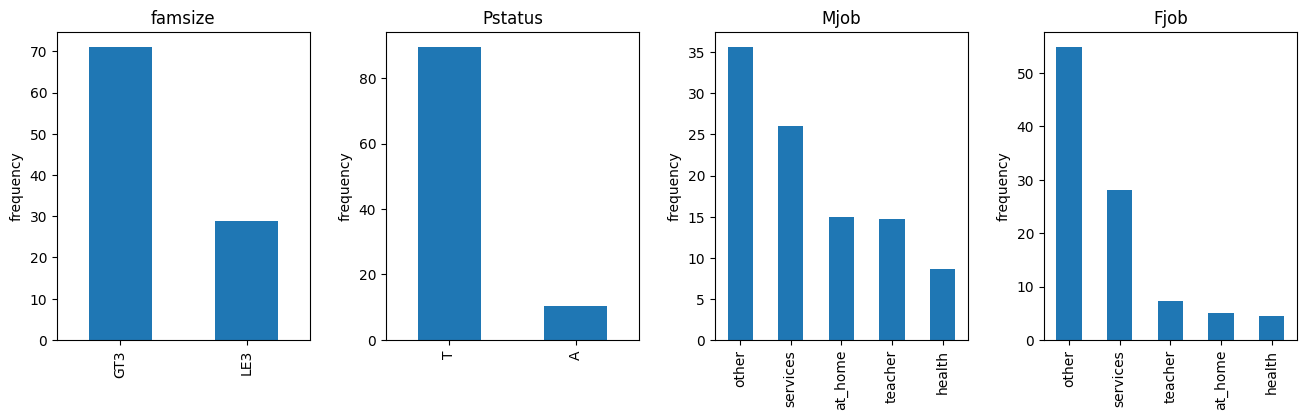

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(16,4))
#Specify a series of barplot
(categorical_data.famsize.value_counts()/395*100).plot(kind='bar', ax=ax[0])
ax[0].set_title('famsize')
ax[0].set_ylabel('frequency')

(categorical_data.Pstatus.value_counts()/395*100).plot(kind='bar', ax=ax[1])
ax[1].set_title('Pstatus')
ax[1].set_ylabel('frequency')

(categorical_data.Mjob.value_counts()/395*100).plot(kind='bar', ax=ax[2])
ax[2].set_title('Mjob')
ax[2].set_ylabel('frequency')

(categorical_data.Fjob.value_counts()/395*100).plot(kind='bar', ax=ax[3])
ax[3].set_title('Fjob')
ax[3].set_ylabel('frequency')

#Give the subplots a little "breathing room"
plt.subplots_adjust(wspace=0.3);

*c. Distribution of guardian, schoolsup, famsup, and paid.*

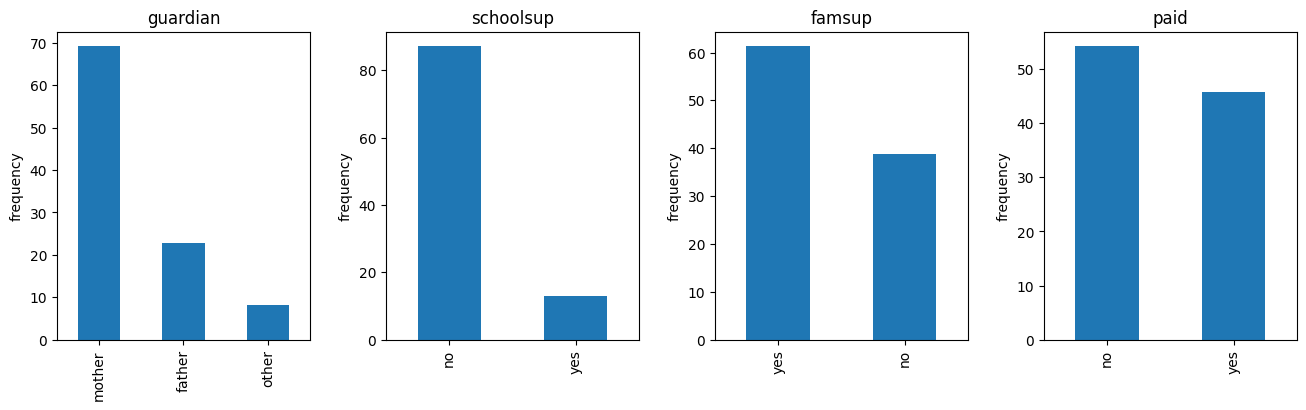

In [23]:
fig, ax = plt.subplots(1, 4, figsize=(16,4))
#Specify a series of barplot
(categorical_data.guardian.value_counts()/395*100).plot(kind='bar', ax=ax[0])
ax[0].set_title('guardian')
ax[0].set_ylabel('frequency')

(categorical_data.schoolsup.value_counts()/395*100).plot(kind='bar', ax=ax[1])
ax[1].set_title('schoolsup')
ax[1].set_ylabel('frequency')

(categorical_data.famsup.value_counts()/395*100).plot(kind='bar', ax=ax[2])
ax[2].set_title('famsup')
ax[2].set_ylabel('frequency')

(categorical_data.paid.value_counts()/395*100).plot(kind='bar', ax=ax[3])
ax[3].set_title('paid')
ax[3].set_ylabel('frequency')

#Give the subplots a little "breathing room"
plt.subplots_adjust(wspace=0.3);

*d.Distribution of activities, nursery, higher, internet, and romantic.*

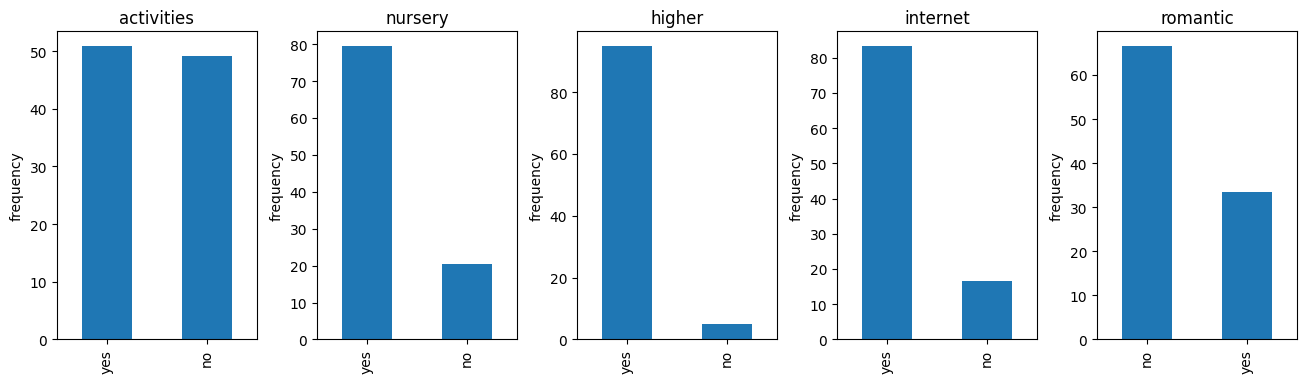

In [24]:
fig, ax = plt.subplots(1, 5, figsize=(16,4))
#Specify a series of barplot
(categorical_data.activities.value_counts()/395*100).plot(kind='bar', ax=ax[0])
ax[0].set_title('activities')
ax[0].set_ylabel('frequency')

(categorical_data.nursery.value_counts()/395*100).plot(kind='bar', ax=ax[1])
ax[1].set_title('nursery')
ax[1].set_ylabel('frequency')

(categorical_data.higher.value_counts()/395*100).plot(kind='bar', ax=ax[2])
ax[2].set_title('higher')
ax[2].set_ylabel('frequency')

(categorical_data.internet.value_counts()/395*100).plot(kind='bar', ax=ax[3])
ax[3].set_title('internet')
ax[3].set_ylabel('frequency')

(categorical_data.romantic.value_counts()/395*100).plot(kind='bar', ax=ax[4])
ax[4].set_title('romantic')
ax[4].set_ylabel('frequency')

#Give the subplots a little "breathing room"
plt.subplots_adjust(wspace=0.3);

*Distribution Of G3 By School*

We use school as an example to demonstrate the distribution of G3 on categorical features. Note that the rows with G3=0 have been droped from the plot below.

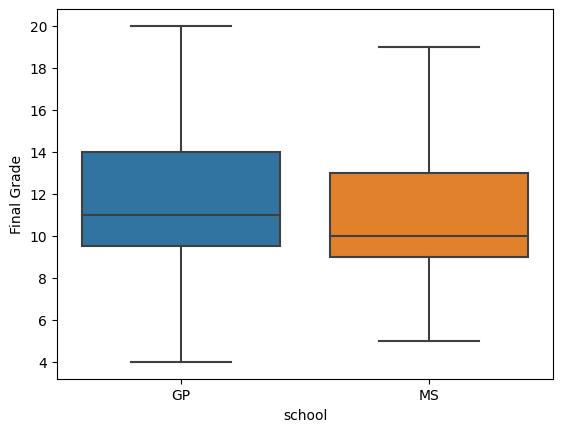

In [25]:
sns.boxplot(x='school', y='G3', data=student_data[student_data['G3'] !=0])
plt.xticks(rotation=0)
plt.ylabel('Final Grade')
plt.xlabel('school');

Students' G3 grade in GP school is slightly higer but more diverse than that in MS school. One possible reason for the diversity in GP school is that it accounts for 88.4% of data and MS school only accounts for 11.6% of data.

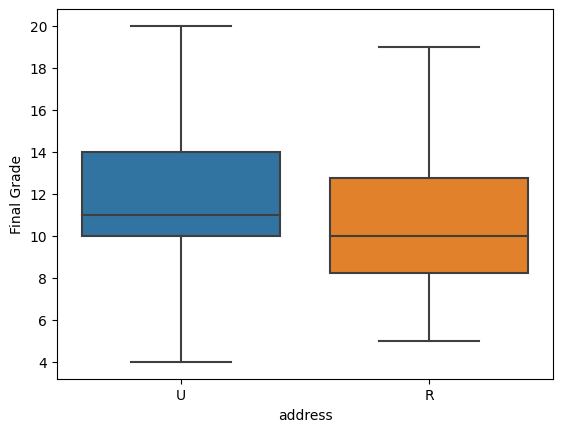

In [26]:
sns.boxplot(x='address', y='G3', data=student_data[student_data['G3'] !=0])
plt.xticks(rotation=0)
plt.ylabel('Final Grade')
plt.xlabel('address');

The above figure shows similar trend for address. Students living in urban (U) area perform slightly better than students living in rural (R) area. Note that 77.7% of students live in urban while 22.3% live in rural area.

#### 2.4.2.4 Numerical Features<a id='2.4.2.4'></a>

**Numeric data summary**

In [27]:
student_data.describe().T

count       mean       std   min   25%   50%   75%   max
age         395.0  16.696203  1.276043  15.0  16.0  17.0  18.0  22.0
Medu        395.0   2.749367  1.094735   0.0   2.0   3.0   4.0   4.0
Fedu        395.0   2.521519  1.088201   0.0   2.0   2.0   3.0   4.0
traveltime  395.0   1.448101  0.697505   1.0   1.0   1.0   2.0   4.0
studytime   395.0   2.035443  0.839240   1.0   1.0   2.0   2.0   4.0
failures    395.0   0.334177  0.743651   0.0   0.0   0.0   0.0   3.0
famrel      395.0   3.944304  0.896659   1.0   4.0   4.0   5.0   5.0
freetime    395.0   3.235443  0.998862   1.0   3.0   3.0   4.0   5.0
goout       395.0   3.108861  1.113278   1.0   2.0   3.0   4.0   5.0
Dalc        395.0   1.481013  0.890741   1.0   1.0   1.0   2.0   5.0
Walc        395.0   2.291139  1.287897   1.0   1.0   2.0   3.0   5.0
health      395.0   3.554430  1.390303   1.0   3.0   4.0   5.0   5.0
absences    395.0   5.708861  8.003096   0.0   0.0   4.0   8.0  75.0
G1          395.0  10.908861  3.319195   3.0   8.0  11.0  13.0  19.0
G2          395.0  10.713924  3.761505   0.0   9.0  11.0  13.0  19.0
G3          395.0  10.415190  4.581443   0.0   8.0  11.0  14.0  20.0

**Distributions Of Feature Values**

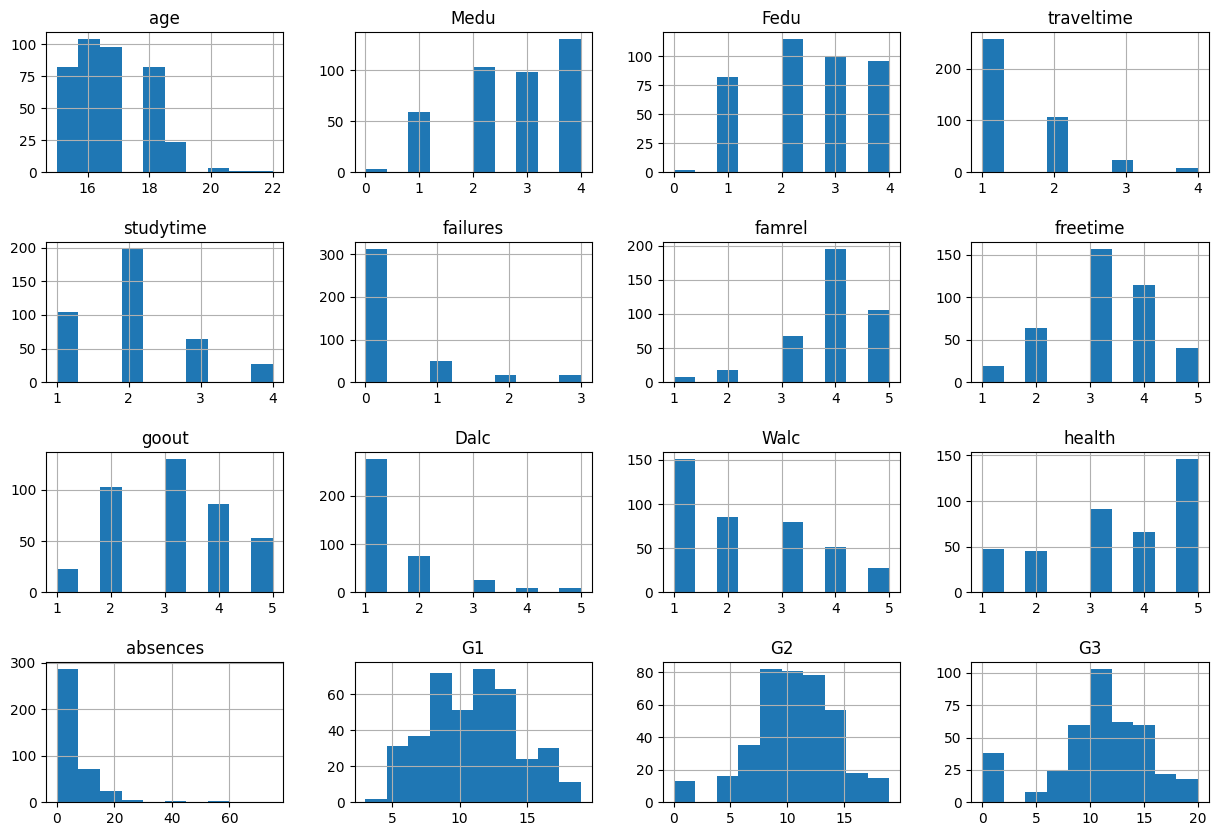

In [28]:
student_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

I am concerned about a few features.

* G1 and G2: G2 has certain zero values while G1 doesn't have any zero values. This may further reduce the available data.
* Absences: most values are in the range of 0 to 20, while only a few is larger than 30.
* Dalc and Walc: they show various trend. Students drink more alcohol in weekends.
* Failure and Travel time: some transformation may be used to process these data because of its non-normal distribution.

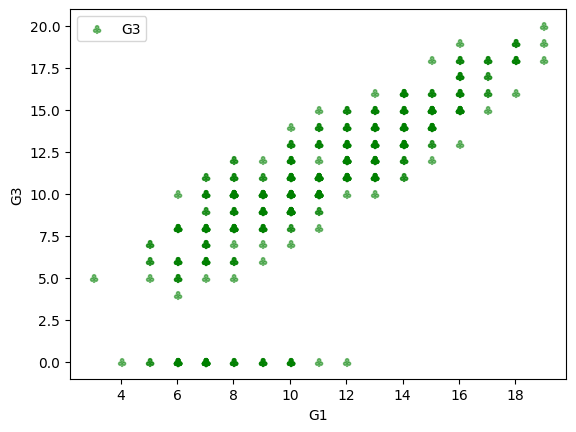

In [29]:
plt.scatter(student_data.G1,student_data.G3,c="g",alpha=0.5, marker=r'$\clubsuit$',
            label="G3")
plt.xlabel("G1")
plt.ylabel("G3")
plt.legend(loc='upper left')
plt.show()

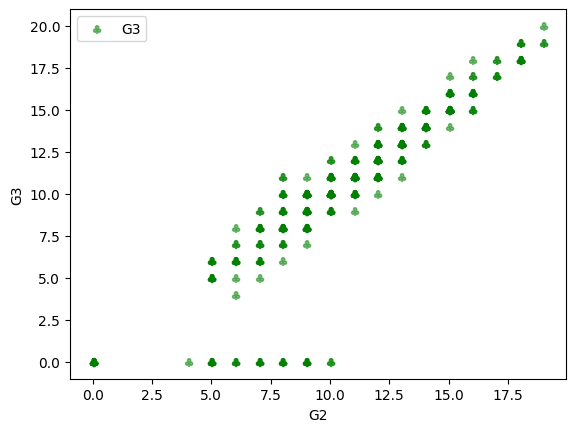

In [30]:
plt.scatter(student_data.G2,student_data.G3,c="g",alpha=0.5, marker=r'$\clubsuit$',
            label="G3")
plt.xlabel("G2")
plt.ylabel("G3")
plt.legend(loc='upper left')
plt.show()

Other than zero values, G3 are closely depending on G1 and G2.

In [31]:
# check the grade of students having many absences
student_data[student_data.absences > 30][['G1','G2','G3']]

G1  G2  G3
74   11  12  11
183   9   9   8
276  10   9   9
307   8   9   8
315  13  11  11

It seems like the high absences doesn't impact the grade dramatically.

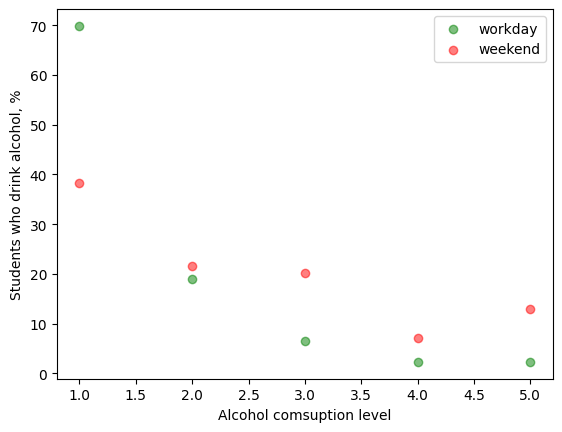

In [32]:
student_data.Dalc.value_counts().values
alc_intake=pd.DataFrame()
alc_intake['level']=student_data.Dalc.value_counts().index
alc_intake['workday']=student_data.Dalc.value_counts().values
alc_intake['weekend']=student_data.Walc.value_counts().values

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(alc_intake.level, alc_intake.workday/395*100, c="g",alpha=0.5, label='workday')
ax1.scatter(alc_intake.level, alc_intake.weekend/395*100, c="r",alpha=0.5, label='weekend')
plt.xlabel("Alcohol comsuption level")
plt.ylabel("Students who drink alcohol, %")
plt.legend(loc='upper right');
plt.show()

In [33]:
col_info.Dalc

meaning                   workday alcohol consumption 
notes      numeric: from 1 - very low to 5 - very high
Name: Dalc, dtype: object

### 2.5 Data Cleaning<a id='2.5'></a>

**Drop Rows With No G3 Data**

In [34]:
clean_data=student_data[student_data.G3 != 0]
clean_data.shape

(357, 33)

**Target values G3 vs. G1,G2**

<AxesSubplot:>

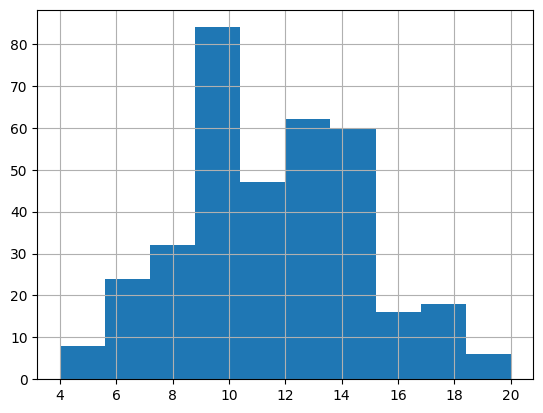

In [35]:
clean_data.G3.hist()

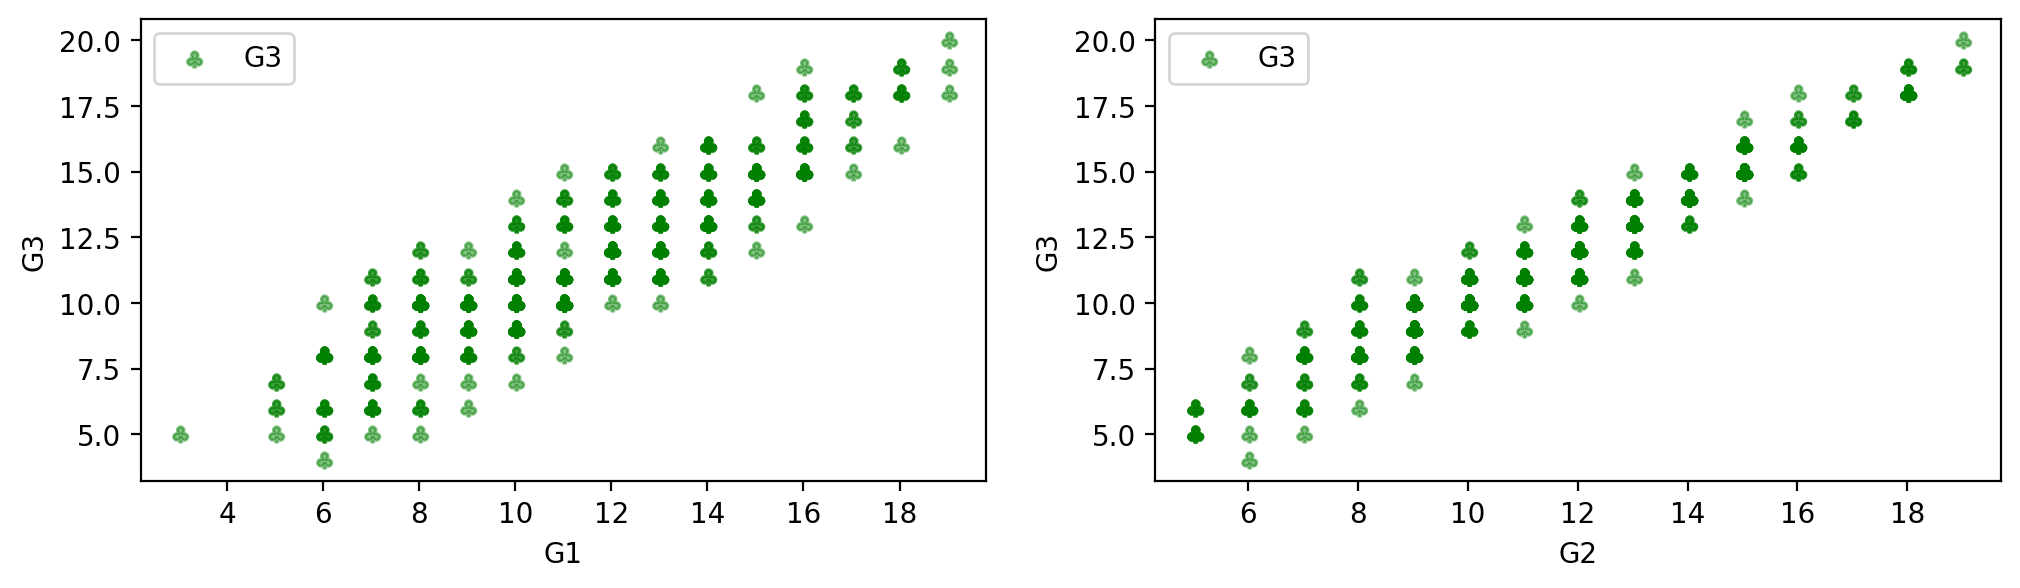

In [36]:
# plot the correlation between G3 and G1 an G2
fig = plt.figure(figsize=(12, 3),dpi=200)
ax1 = fig.add_subplot(1,2,2)
plt.scatter(clean_data.G2,clean_data.G3,c="g",alpha=0.5, marker=r'$\clubsuit$',
            label="G3")
plt.xlabel("G2")
plt.ylabel("G3")
plt.legend(loc='upper left')

ax1 = fig.add_subplot(1,2,1)
plt.scatter(clean_data.G1,clean_data.G3,c="g",alpha=0.5, marker=r'$\clubsuit$',
            label="G3")
plt.xlabel("G1")
plt.ylabel("G3")
plt.legend(loc='upper left')

plt.subplots_adjust(wspace = 0.2)
plt.show();

The zero values are removed from G3, a strong relationship is exhibited between G3 and G1, G2.

**Distributions of numerical features**

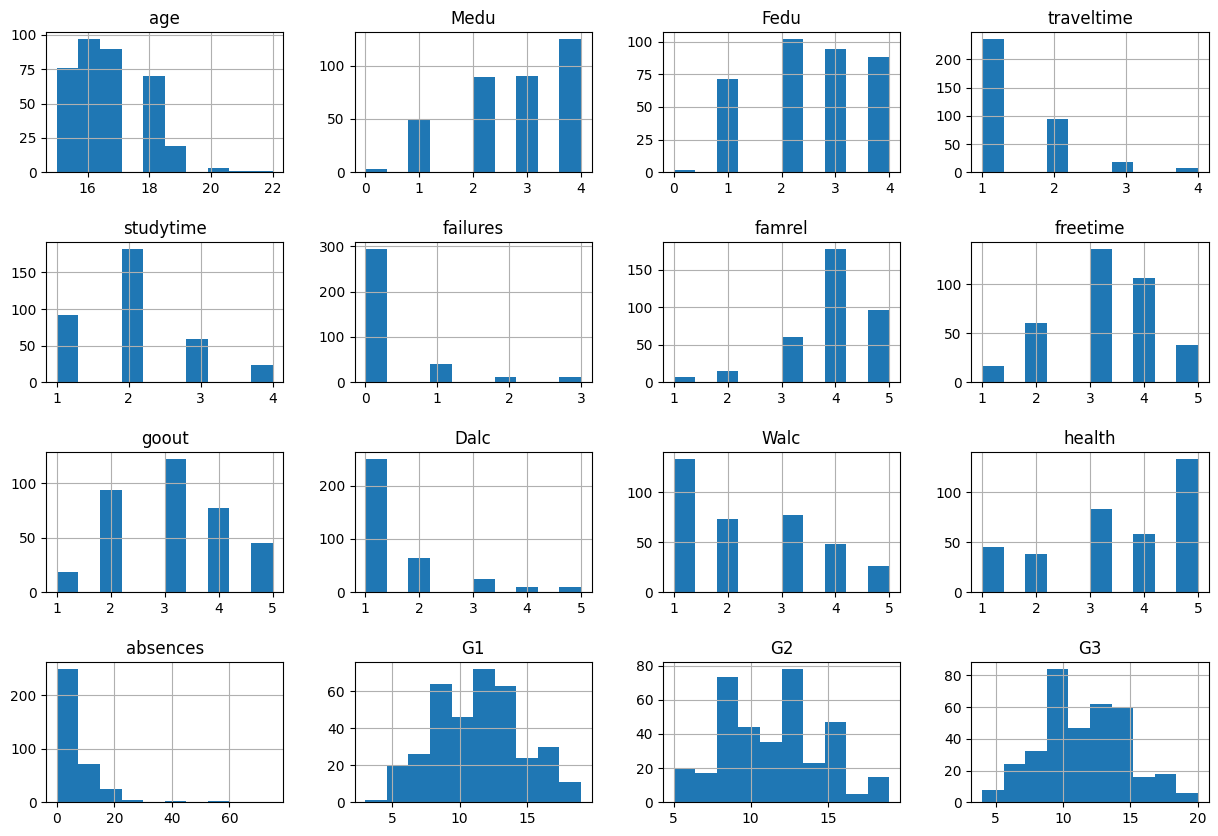

In [37]:
clean_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

**Save data**

In [38]:
clean_data.shape

(357, 33)

In [39]:
%pwd

'c:\\DS\\Github\\Capstone-2\\Notebook'

In [41]:
# save the data to a new csv file
datapath = '../data'
save_file(clean_data, 'student_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "../data\student_data_cleaned.csv"


### 2.6 Summary<a id='2.6'></a>

- There is no missing data;
- There is no duplicated data;
- The rows with the target variable G3 of zero have been dropped.
- The distribution of failure, travel time may need transformation
- various trend exibits in workday and weekend alcohol comsumption